In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from PIL import Image

In [7]:
# Define paths and classes
source_directory = "/content/drive/MyDrive/Colab Notebooks/thermal_images/thermal_dataset/thermal images UL"
output_directory = "/content/drive/MyDrive/Colab Notebooks/thermal_images/thermal_dataset/processed_data_Unet"
classes = ['Blast', 'BLB', 'healthy', 'hispa', 'leaf folder', 'leaf spot']

In [8]:
# Function to check if an image is valid
def is_valid_image(image_path):
    try:
        img = Image.open(image_path)
        img.verify()  # Verify if the image is valid
        return True
    except Exception:
        return False


In [27]:
# Function to filter images and return valid images only
def filtered_image_generator(directory, classes, target_size=(299, 299), batch_size=32):
    valid_images = []
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        valid_images_class = [img for img in os.listdir(class_dir) if is_valid_image(os.path.join(class_dir, img))]
        valid_images.append(valid_images_class)

    # Create ImageDataGenerator with valid images only
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                 horizontal_flip=True, rotation_range=40,
                                 shear_range=0.2, zoom_range=0.2,
                                 width_shift_range=0.2, height_shift_range=0.2)

    return datagen.flow_from_directory(
        directory,
        classes=classes,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    ), datagen.flow_from_directory(
        directory,
        classes=classes,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

In [18]:
# Load GoogleNet (InceptionV3) pre-trained model without the top layer (to customize)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [19]:
# Freeze the base model to not train it during the initial phase
base_model.trainable = False

In [23]:
# Create a new model on top of the pre-trained GoogleNet
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')  # Output layer with as many neurons as classes
])

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Get the filtered train and validation generators
train_generator, val_generator = filtered_image_generator(output_directory, classes)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Found 2005 images belonging to 6 classes.
Found 498 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.2771 - loss: 2.4502 - val_accuracy: 0.4297 - val_loss: 1.5390
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4362 - loss: 1.3877 - val_accuracy: 0.4960 - val_loss: 1.4476
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4653 - loss: 1.2883 - val_accuracy: 0.4639 - val_loss: 1.4241
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 991ms/step - accuracy: 0.5147 - loss: 1.2279 - val_accuracy: 0.5341 - val_loss: 1.3280
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 976ms/step - accuracy: 0.5284 - loss: 1.1470 - val_accuracy: 0.4598 - val_loss: 1.3586
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5527 - loss: 1.1046 - val_accuracy: 0.5462 - val_loss: 1.3192
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 976ms/step - accuracy: 0.5234 - loss: 1.1493 - val_accuracy: 0.5703 - val_loss: 1.2281
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5945 - loss: 1.0384 - val_accuracy: 0.5823 -

In [29]:
# Plotting training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


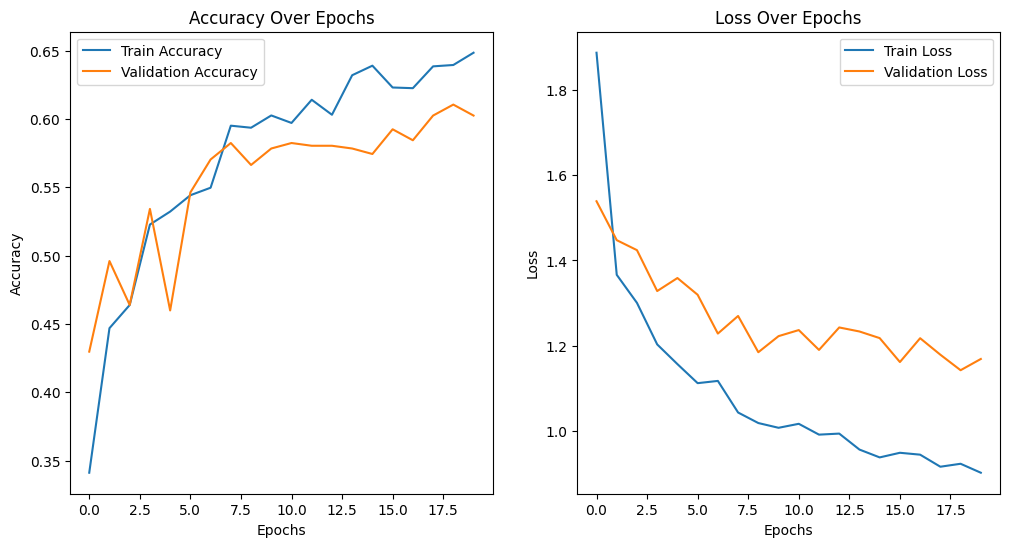

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.4893 - loss: 1.3510 - val_accuracy: 0.6064 - val_loss: 1.1675
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 992ms/step - accuracy: 0.5683 - loss: 1.0964 - val_accuracy: 0.6044 - val_loss: 1.1112
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 977ms/step - accuracy: 0.6025 - loss: 1.0237 - val_accuracy: 0.6165 - val_loss: 1.0898
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6699 - loss: 0.8760 - val_accuracy: 0.6084 - val_loss: 1.1018
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 998ms/step - accuracy: 0.6792 - loss: 0.8291 - val_accuracy: 0.6426 - val_loss: 1.0189
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 999ms/step - accuracy: 0.7042 - loss: 0.8128 - val_accuracy: 0.6606 - val_loss: 1.0122
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 985ms/step - accuracy: 0.7367 - loss: 0.7526 - val_accuracy: 0.6606 - val_loss: 0.9626
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7397 - loss: 0.7165 - val_accuracy: 0.

In [30]:
# Call the function to plot the training and validation metrics
plot_training_history(history)

# Optionally, fine-tune the model by unfreezing some layers of the base model
base_model.trainable = True
for layer in base_model.layers[:249]:  # Unfreeze some layers
    layer.trainable = False

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_fine_tune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)
